In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

frame = pd.read_csv('CarPrice_Assignment.csv')
frame.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

<Axes: >

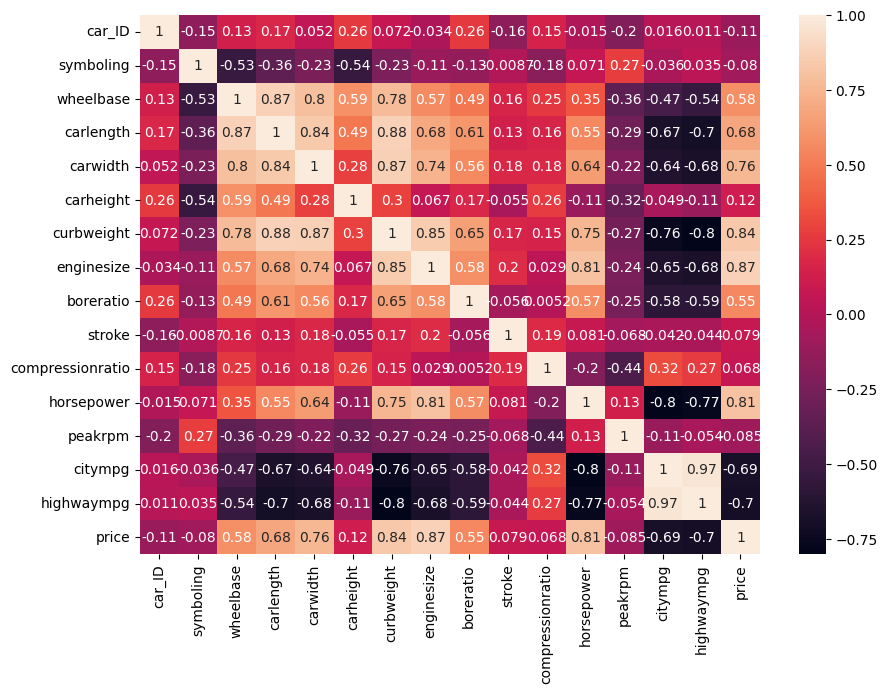

In [3]:
plt.figure(figsize=(10,7))
sns.heatmap(frame.corr(numeric_only=True),annot=True)

# identifying object column

In [8]:
obj = frame.select_dtypes(include='object')
objColList = obj.columns

# encoding

In [30]:
carframe = frame
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for col in objColList:
    carframe[col] = lb.fit_transform(carframe[col])

# finding best  features

In [37]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

x,y = carframe.iloc[:,:-1],carframe['price']
lrg = LinearRegression()
for i in range(4,11):
    sfs = SequentialFeatureSelector(lrg,k_features=i,forward=True)
    sfs.fit(x,y)
    print(i)
    print(sfs.k_feature_names_)
    print(sfs.k_score_*100)
    print()

4
('enginelocation', 'carwidth', 'enginesize', 'stroke')
65.30903543960048

5
('enginelocation', 'carwidth', 'enginesize', 'stroke', 'peakrpm')
67.28792565961632

6
('enginelocation', 'carwidth', 'enginesize', 'stroke', 'compressionratio', 'peakrpm')
68.26741234400482

7
('carbody', 'enginelocation', 'carwidth', 'enginesize', 'stroke', 'compressionratio', 'peakrpm')
68.56789107215626

8
('symboling', 'carbody', 'enginelocation', 'carwidth', 'enginesize', 'stroke', 'compressionratio', 'peakrpm')
68.60808206577411

9
('symboling', 'doornumber', 'carbody', 'enginelocation', 'carwidth', 'enginesize', 'stroke', 'compressionratio', 'peakrpm')
68.36387758274023

10
('symboling', 'doornumber', 'carbody', 'enginelocation', 'carwidth', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'peakrpm')
68.10618197803164



In [38]:
carframe2 = carframe[['symboling', 'carbody', 'enginelocation', 'carwidth', 'enginesize', 'stroke', 'compressionratio', 'peakrpm']]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(carframe2,y,test_size=0.2,random_state=42)
lrg.fit(x_train,y_train)
print(lrg.score(x_test,y_test)*100)
print(lrg.score(x_train,y_train)*100)

81.63339631889104
87.15297784371853


In [33]:
new_data = pd.DataFrame([[0,68.9,141,3.15,5400]], 
                    columns=['enginelocation', 'carwidth', 'enginesize', 'stroke', 'peakrpm'])
print(lrg.predict(new_data))

[19387.47300894]


In [39]:
import pickle
pickle.dump(lrg,open('CarModel.pkl','wb'))

In [41]:
for col in ['symboling', 'carbody', 'enginelocation', 'carwidth', 'enginesize', 'stroke', 'compressionratio', 'peakrpm']:
    print(f'for {col} min : {carframe2[col].min()} max : {carframe2[col].max()}')

for symboling min : -2 max : 3
for carbody min : 0 max : 4
for enginelocation min : 0 max : 1
for carwidth min : 60.3 max : 72.3
for enginesize min : 61 max : 326
for stroke min : 2.07 max : 4.17
for compressionratio min : 7.0 max : 23.0
for peakrpm min : 4150 max : 6600


In [42]:
carframe2

,symboling,carbody,enginelocation,carwidth,enginesize,stroke,compressionratio,peakrpm
0,3,0,0,64.1,130,2.68,9.0,5000
1,3,0,0,64.1,130,2.68,9.0,5000
2,1,2,0,65.5,152,3.47,9.0,5000
3,2,3,0,66.2,109,3.40,10.0,5500
4,2,3,0,66.4,136,3.40,8.0,5500
...,...,...,...,...,...,...,...,...
200,-1,3,0,68.9,141,3.15,9.5,5400
201,-1,3,0,68.8,141,3.15,8.7,5300
202,-1,3,0,68.9,173,2.87,8.8,5500
203,-1,3,0,68.9,145,3.40,23.0,4800
